In [30]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [31]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
#load dataset
pima = pd.read_csv ("diabetes.csv", header=None, names=col_names)
pima_df= pima.head()
print(pima)
print(pima_df)

     pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0           6      148  72    35        0  33.6     0.627   50      1
1           1       85  66    29        0  26.6     0.351   31      0
2           8      183  64     0        0  23.3     0.672   32      1
3           1       89  66    23       94  28.1     0.167   21      0
4           0      137  40    35      168  43.1     2.288   33      1
..        ...      ...  ..   ...      ...   ...       ...  ...    ...
763        10      101  76    48      180  32.9     0.171   63      0
764         2      122  70    27        0  36.8     0.340   27      0
765         5      121  72    23      112  26.2     0.245   30      0
766         1      126  60     0        0  30.1     0.349   47      1
767         1       93  70    31        0  30.4     0.315   23      0

[768 rows x 9 columns]
   pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0         6      148  72    35        0  33.6     0.627   50      1


In [32]:
#Feature Selection

#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
x = pima[feature_cols] # Features
y = pima.label # Target variable


In [33]:
#Splitting Data
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
#70% training and 30% test

In [36]:
#Building Decision Tree Model
 # Create Decision Tree classifer object
clf = DecisionTreeClassifier()
#Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
# Test Model
y_pred = clf.predict(X_test)
print(y_pred)
print(clf)

[0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 1 0
 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0
 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0]
DecisionTreeClassifier()


In [37]:
#Evaluating the Model
###
#Model Accuracy, how often is the classifier correct?
print("Accuracy: ", metrics.accuracy_score (y_test, y_pred))

Accuracy:  0.670995670995671


In [42]:

#Visualizing Decision Trees
from sklearn.tree import export_graphviz
import graphviz
#Export the decision tree to DOT format
dot_data = export_graphviz(clf, out_file=None,feature_names=X_train.columns, # Replace with your feature names
                           class_names=[str(x) for x in clf.classes_], # Convert class names to stri
                           filled=True, rounded=True, special_characters=True)
#Create and display the graph

graph = graphviz.Source (dot_data)
graph.render("decision_tree") # Saves the visualization as a file (e.g., "decision_tree.pdf")
graph.view("decision_tree") # Opens the visualization using the default viewer

'decision_tree.pdf'

In [43]:


#Optimizing Decision Tree Performance

# Create Decision Tree classifer object
clf = DecisionTreeClassifier (criterion="entropy", max_depth=3)
#Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
#Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


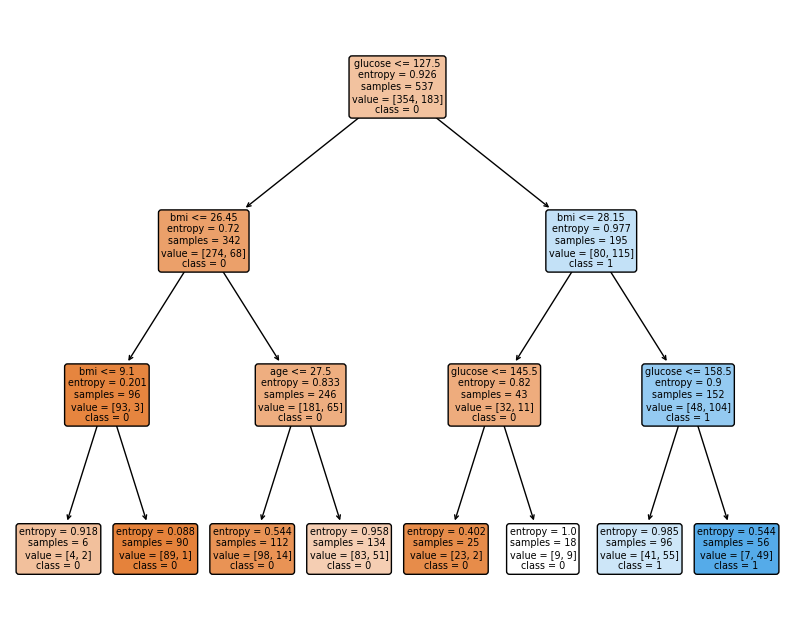

In [46]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 8))
plot_tree(clf, feature_names=X_train.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.savefig('decision_tree2.pdf')  # Save the visualization as a PDF file
plt.show()